In [10]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import time
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [9]:
pol_to_rep = {
  -1.0: 0,
  -0.9: 1,
  -0.8: 2,
  -0.7: 3,
  -0.6: 4,
  -0.5: 5,
  -0.4: 6,
  -0.3: 7,
  -0.2: 8,
  -0.1: 9,
  -0.0: 10,
  0.0: 10,
  0.1: 11,
  0.2: 12,
  0.3: 13,
  0.4: 14,
  0.5: 15,
  0.6: 16,
  0.7: 17,
  0.8: 18,
  0.9: 19,
  1.0: 20,
  1.1: 21
}

C:\Users\Rasmu\AppData\Local\Temp/ipykernel_16468/2046200562.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['Sentence #'],as_index=False)['Word', 'Lemma', 'Tag', 'POS', 'Dep', 'Polarity', 'Sentiment', 'Polarity_rounded', 'Word_index'].agg(lambda x: list(x))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


,Sentence #,Word,Lemma,Tag,POS,Dep,Polarity,Sentiment,Polarity_rounded,Word_index
0,1,"[organizations, decided, drop, women, accused,...","[organization, decide, drop, woman, accuse, in...","[NNS, VBN, VB, NNS, VBD, JJ, NN, JJ, NN]","[NOUN, VERB, VERB, NOUN, VERB, ADJ, NOUN, ADJ,...","[NSUBJ, ROOT, XCOMP, NSUBJ, ADVCL, AMOD, POBJ,...","[-0.19334491413051003, -0.034137248164741, -0....","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[8, 10, 9, 14, 10, 10, 9, 11, 10]","[10976, 6545, 7141, 15486, 4009, 9164, 4816, 1..."
1,2,"[Women, previously, worked, winning, actor, to...","[woman, previously, work, win, actor, tell, CN...","[NNS, RB, VBD, VBG, NN, VBD, NNP, RB, NNS, NNS...","[NOUN, ADV, VERB, VERB, NOUN, VERB, PROPN, ADV...","[NSUBJ, ADVMOD, RELCL, AMOD, POBJ, ROOT, DOBJ,...","[0.35316112487835105, -0.039333311401716003, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[14, 10, 6, 7, 10, 9, 10, 10, 10, 12, 11, 10, ...","[3843, 11768, 15505, 15443, 4050, 14563, 651, ..."
2,3,"[response, allegations, Visa, announced, suspe...","[response, allegation, Visa, announce, suspend...","[NN, NNS, NNP, VBD, VBN, NN, NN]","[NOUN, NOUN, PROPN, VERB, VERB, NOUN, NOUN]","[POBJ, POBJ, NSUBJ, ROOT, CCOMP, COMPOUND, POBJ]","[-0.039620517765398, -0.01715489752247, -0.023...","[1, 1, 1, 1, 1, 1, 1]","[10, 10, 10, 9, 9, 8, 10]","[12615, 4242, 3738, 4341, 14183, 10179, 5314]"
3,4,"[aware, allegations, Mr.]","[aware, allegation, Mr.]","[JJ, NNS, NNP]","[ADJ, NOUN, PROPN]","[ACOMP, POBJ, COMPOUND]","[-0.035281092794016006, -0.01715489752247, -0....","[1, 1, 1]","[10, 10, 9]","[4661, 4242, 2405]"
4,5,"[point, Visa, suspending, marketing, actor, fe...","[point, Visa, suspend, marketing, actor, featu...","[NN, NNP, VBG, NN, NN, VBN, NNP, VBD, NN]","[NOUN, PROPN, VERB, NOUN, NOUN, VERB, PROPN, V...","[POBJ, NSUBJ, CCOMP, DOBJ, NSUBJPASS, RELCL, N...","[-0.19485058785637502, -0.023234042885702, -0....","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[8, 10, 9, 8, 10, 10, 10, 5, 9]","[11545, 3738, 14184, 10179, 4050, 7892, 3738, ..."
5,6,"[TransLink, public, transit, system, decided, ...","[TransLink, public, transit, system, decide, s...","[NNP, JJ, NN, NN, VBD, VB, NN, NN, NN, VB, NNP...","[PROPN, ADJ, NOUN, NOUN, VERB, VERB, NOUN, NOU...","[NSUBJ, AMOD, COMPOUND, APPOS, ROOT, XCOMP, DO...","[0.0007588481104900001, -0.139873344780055, -0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 9, 10, 8, 10, 10, 10, 10, 10, 10, 10, 5, ...","[3587, 12003, 14677, 14250, 6545, 13870, 15237..."
6,8,"[light, information, learned, allegations, act...","[light, information, learn, allegation, actor,...","[NN, NN, VBN, NNS, NN, NNP, VBN, VB, NN, NNS, ...","[NOUN, NOUN, VERB, NOUN, NOUN, PROPN, VERB, VE...","[POBJ, POBJ, CCOMP, POBJ, COMPOUND, NSUBJ, CCO...","[0.015637420510605002, -0.19751276997209202, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10,...","[9899, 9279, 9796, 4242, 4050, 3587, 6545, 112..."
7,9,"[reaching, Visa, discuss]","[reach, Visa, discuss]","[VBG, NNP, VB]","[VERB, PROPN, VERB]","[ROOT, POBJ, ADVCL]","[-0.09895350657222801, -0.023234042885702, -0....","[1, 1, 1]","[9, 10, 10]","[12198, 3738, 6913]"
8,11,"[report, released, issued, apology, knows, wor...","[report, release, issue, apology, know, work, ...","[NN, VBN, VBD, NN, VBZ, VBN, VBZ, RB, VB, RB, ...","[NOUN, VERB, VERB, NOUN, VERB, VERB, VERB, ADV...","[NSUBJPASS, ADVCL, CCOMP, DOBJ, RELCL, CONJ, C...","[-0.264646633658489, -0.083428762762737, -0.10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[7, 9, 9, 10, 9, 6, 9, 10, 10, 10, 11, 10, 10,...","[12520, 12426, 9530, 4389, 9696, 15505, 9696, ..."
9,12,"[production, assistant, working, 2015, film, G...","[production, assistant, work, 2015, film, go, ...","[NN, NN, VBG, CD, NN, VBG, NNP, VBD, NNP, JJ, ...","[NOUN, NOUN, VERB, NUM, NOUN, VERB, PROPN, VER...","[COMPOUND, NSUBJ, ACL, NUMMOD, POBJ, ADVCL, PO...","[-0.042001495905306004, -0.025421696875198, -0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

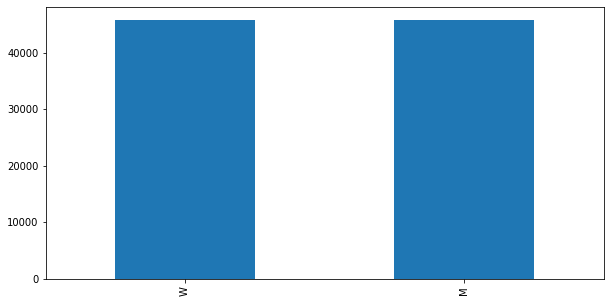

In [11]:
import pandas as pd

df = pd.read_json('../datasets/7_dataset_w_tags_SM.json')

M, W = df["Gender"].value_counts()
if M>W:
    diff = M-W
    df = df.drop(df.loc[df['Gender'] == 'M'].index[:diff], axis=0)
elif W>M:
    diff = W-M
    df = df.drop(df.loc[df['Gender'] == 'W'].index[:diff], axis=0)

df["Gender"].value_counts().plot(kind="bar", figsize=(10,5))
df['Sentiment'] = df.Gender.apply(lambda x: -1 if x == "M" else 1)
df = df.drop('Gender', axis=1)
df['Dep'] = df['Dep'].str.upper()

df['Polarity_rounded'] = df['Polarity'].apply(lambda s: pol_to_rep[round(float(s), 1)])

word_vocab = np.unique(df['Word']).tolist()
word_vocab.insert(0, '<PAD>')

polarity_range = []

for i in np.arange(0.0, 2.1, 0.1):
    polarity_range.append(int(round(i*10+1, 1)))

i_to_word = {i:word for  i, word in enumerate(word_vocab)}
word_to_i = {word:i for  i, word in enumerate(word_vocab)}

df['Word_index'] = df['Word'].map(word_to_i)


df = df.groupby(['Sentence #'],as_index=False)['Word', 'Lemma', 'Tag', 'POS', 'Dep', 'Polarity', 'Sentiment', 'Polarity_rounded', 'Word_index'].agg(lambda x: list(x))
#df = df.sample(frac=1).reset_index(drop=True)


print(polarity_range)

df.head(10)

In [389]:
tokens = df['Word_index'].tolist()
polarities = df['Polarity_rounded'].tolist()

max_length = max([len(s) for s in tokens])

pad_tokens = pad_sequences(tokens, maxlen=max_length, dtype='int32', padding='post')
pad_polarities = pad_sequences(polarities, maxlen=max_length, dtype='int32', padding='post', value=21)

pad_polarities = [to_categorical(i, num_classes=len(pol_to_rep)) for i in pad_polarities]

for i in pad_polarities[10]:
    print(i)

for i in polarities[10]:
    print(i)
    
train_tokens, test_tokens, train_polarities, test_polarities = train_test_split(pad_tokens, pad_polarities, test_size=0.4, random_state=42)



[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [390]:
# Borrowed from: https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        exp = lr0 * 0.1**(epoch / s)
        tf.summary.scalar('learning rate', data=exp, step=epoch)
        return exp
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=10)

root_logdir = os.path.join(os.curdir, "./logged_models/keras_words")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_log_dir = get_run_logdir()
file_writer = tf.summary.create_file_writer(run_log_dir + "/metrics")
file_writer.set_as_default()

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_dir)

In [392]:
# Borrowed from: https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
import numpy as np
import tensorflow as tf
tokenizer = Tokenizer(oov_token="<OOV>")

input_dim = len(word_vocab)+1
embedding_dim = 64
output_dim = 64

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length, mask_zero=True),
        layers.LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        layers.TimeDistributed(layers.Dense(len(polarity_range)+1, activation="softmax"))
])

adam = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # cross entropy loss chapter 4 HOML - categorial crossentropy because to_categorial 

model.summary()

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
num_epochs = 20


history = model.fit(train_tokens, np.array(train_polarities), epochs=num_epochs, callbacks =[earlystopping, lr_scheduler, tensorboard_cb], validation_split=0.2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 51, 64)            999552    
_________________________________________________________________
lstm_36 (LSTM)               (None, 51, 64)            33024     
_________________________________________________________________
time_distributed_25 (TimeDis (None, 51, 22)            1430      
Total params: 1,034,006
Trainable params: 1,034,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
168/168 [==============================] - 6s 30ms/step - loss: 0.1010 - accuracy: 0.8363 - val_loss: 0.0172 - val_accuracy: 0.9773
Epoch 2/20
168/168 [==============================] - 4s 26ms/step - loss: 0.0072 - accuracy: 0.9891 - val_loss: 0.0139 - val_accuracy: 0.9810
Epoch 3/20
168/168 [==============================] - 4s 25ms/step - loss: 0.0043 - acc

In [ ]:
y_pred = model.predict(test_tokens)

y_pred.shape

(4481, 51, 21)

[10 10  5 10 10 10  9 10 10  8 10 14 10  9 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10] [10 10  5 10 10 10  9 10 10  8 10 14 10  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9]
[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


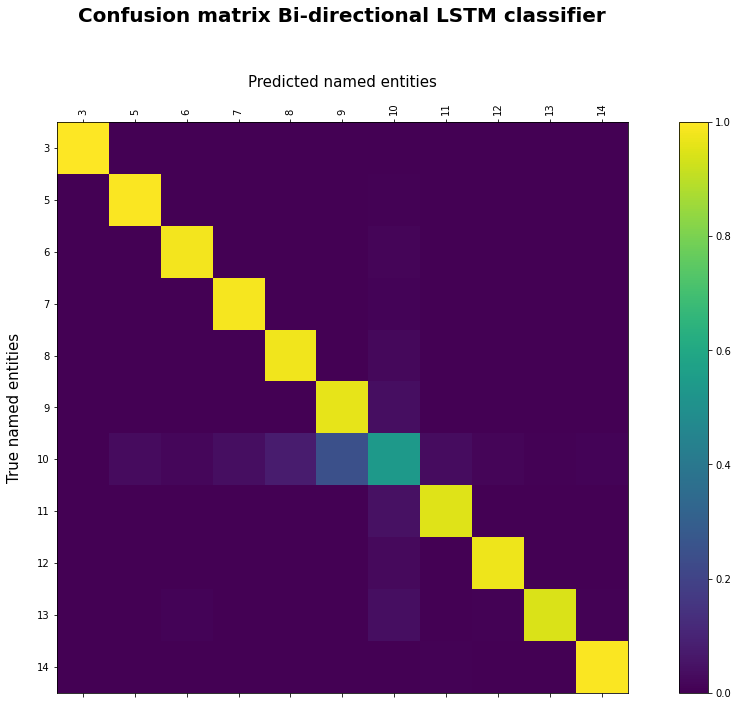

In [ ]:
from sklearn.metrics import confusion_matrix
from itertools import chain

y_classes = y_pred.argmax(axis=-1)
cm_true = np.array(test_polarities).argmax(axis=-1).flatten()
cm_pred = y_classes.flatten()

#cm_true = [x - 10 for x in cm_true]
#cm_pred = [x - 10 for x in cm_pred]


print(cm_true[:30], cm_pred[:30])


cm = confusion_matrix(cm_true, cm_pred, normalize='true')

fig = plt.figure( figsize=[18.5,10.5])
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
ax.set_xlabel('Predicted named entities', fontsize = 15, labelpad=15.0)
ax.xaxis.set_label_position('top')
ax.set_ylabel('True named entities', fontsize = 15, labelpad=15.0)
ax.set_title('Confusion matrix Bi-directional LSTM classifier',fontweight="bold", size=20, pad=100.0)

conf_x = []

temp = set(chain(*df['Polarity_rounded']))

for i in temp:
    conf_x.append(i)

print(sorted(conf_x))

fig.colorbar(cax)
plt.xticks(range(len(temp)),sorted(conf_x), rotation=90)
plt.yticks(range(len(temp)), sorted(conf_x))
plt.show()

In [ ]:
report = classification_report(cm_true, cm_pred, output_dict=True)
df_perf = pd.DataFrame.from_dict(report).transpose()
df_perf_2 = df_perf[:12]
df_perf_2.insert(loc=0, column='Polarity', value=conf_x)
df_perf_2.precision = df_perf_2.precision.round(2)
df_perf_2.recall = df_perf_2.recall.round(2)
df_perf_2['f1-score'] = df_perf_2['f1-score'].round(2)
df_perf_2.support = df_perf_2.support.round()
df_perf_2.reset_index(drop=True, inplace=True)


df_perf_2

ValueError: Length of values (11) does not match length of index (12)